In [13]:
import pandas as pd
import seaborn as sns

In [11]:
df=pd.read_csv('/Users/rajasekharreddy/Desktop/MLAssignments/wdbc_with_headers.csv')

In [14]:
# Check how many null values are present.
df.isna().sum()

ID                         0
Diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

/Users/rajasekharreddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

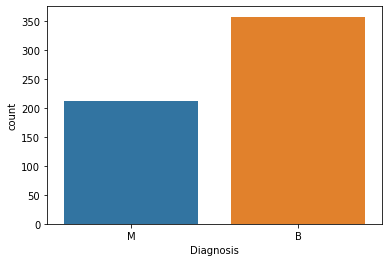

In [15]:
# visualizing the target variable.
sns.countplot(df['Diagnosis'])

In [19]:
# Dividing the data as per independent 
x=df.drop(columns=["Diagnosis"],axis=1)

In [20]:
# Seperate the target variable.
y=df["Diagnosis"].values

In [21]:
# Splitting the data as per the test_size = 0.70 for training data and remaining for testing data.
# Random state is a parameter used to control the randomness of a sample. The model will always provide a same results if it has a definite value of random state, and if it has been same training data and same hyperparameters.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=100)

In [22]:
# To display the train data and test data.
print(x_train.shape[0])
print(x_test.shape[0])

398
171


In [23]:
print(df.dtypes)

ID                           int64
Diagnosis                   object
mean_radius                float64
mean_texture               float64
mean_perimeter             float64
mean_area                  float64
mean_smoothness            float64
mean_compactness           float64
mean_concavity             float64
mean_concave_points        float64
mean_symmetry              float64
mean_fractal_dimension     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
worst_radius               float64
worst_texture              float64
worst_perimeter            float64
worst_area                 float64
worst_smoothness           float64
worst_compactness          float64
worst_concavity     

In [24]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [25]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [26]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)  

In [27]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [28]:
print(cm)

[[102   0]
 [ 12  57]]


In [33]:
# Calculating the Accuracy Score of a Model.
from sklearn.metrics import accuracy_score
print("Accuracy Score is:",accuracy_score(y_test,y_pred))

Accuracy Score is: 0.9298245614035088


In [34]:
# Error.
print("Error is:",100-accuracy_score(y_test,y_pred)*100)

Error is: 7.017543859649123


In [36]:
# Depends on the value we took.
# accuracy_score(y_hat,y_test)
true_positive = cm[1][1]
false_negative = cm[1][0]
false_positive= cm[0][1] 
true_negative = cm[0][0]

In [37]:
# Classification Accuracy.
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9298245614035088

In [38]:
# Per class Accuracy (Sensitivity) or (Recall)
Per_class_acc_true_pos = true_positive / (true_positive+false_negative)
Per_class_acc_true_pos

0.8260869565217391

In [39]:
# Per class Accuracy for negative value (Specificity) or (Precision)
Per_class_acc_true_neg = true_negative/(false_positive+true_negative)
Per_class_acc_true_neg

1.0

In [40]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [41]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8260869565217391

In [42]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9047619047619047

In [86]:
y_pred = pd.DataFrame(y_pred, columns=['Diagnosis'])
y_test=  pd.DataFrame(y_test, columns=['Diagnosis'])

In [88]:
y_pred = y_pred.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [91]:
# Replacing the categorical variables to binary variables.
y_pred['Diagnosis']= y_pred['Diagnosis'].replace({"M":0,"B":1})
y_test['Diagnosis']=y_test["Diagnosis"].replace({"M":0,"B":1})

In [96]:
# Area Under Curve
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score,roc_curve
auc = roc_auc_score(y_test, y_pred)
auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
thresholds

[0.         0.17391304 1.        ]
[0. 1. 1.]


array([2, 1, 0])

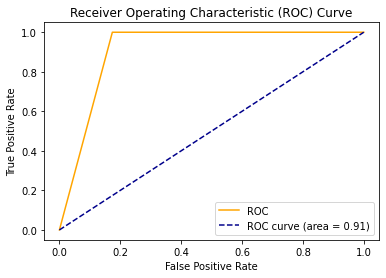

In [97]:
# Calculating ROC Curve.
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
